In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Experience-Salary.csv")

In [3]:
df.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [4]:
df.rename(columns={
    "exp(in months)" : "Experience",
    "salary(in thousands)" : "Salary"
}, inplace = True)

In [5]:
df.head()

,Experience,Salary
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  1000 non-null   float64
 1   Salary      1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [8]:
df.describe()

,Experience,Salary
count,1000.000000,1000.000000
mean,26.157825,26.722597
std,8.717091,8.844761
min,0.697594,-1.276342
25%,20.073600,20.531008
50%,25.875225,26.745576
75%,32.406986,32.615753
max,49.463222,55.297016


<Axes: ylabel='Salary'>

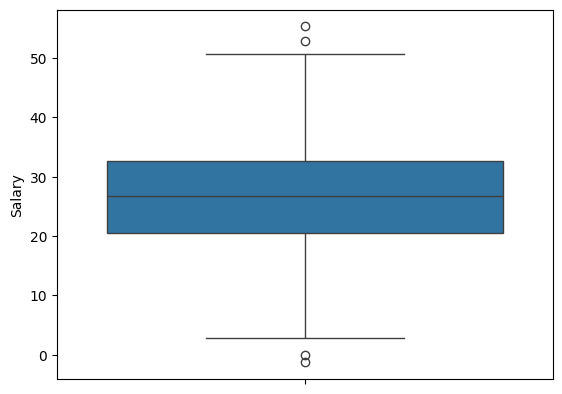

In [9]:
sns.boxplot(df["Salary"])

<Axes: ylabel='Experience'>

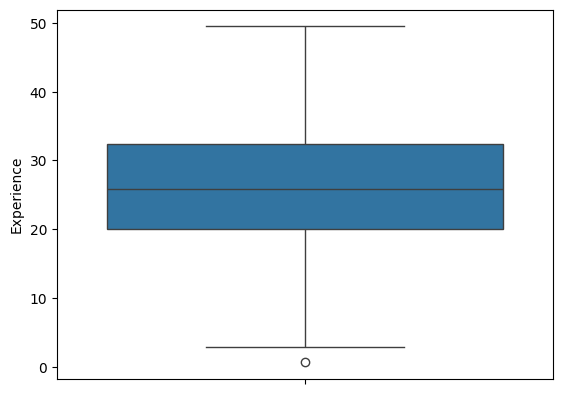

In [10]:
sns.boxplot(df["Experience"])

In [11]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df = df[(df['Salary'] >= lower) & (df['Salary'] <= upper)]

In [12]:
df.shape

(996, 2)

In [13]:
df.isnull().sum()

Experience    0
Salary        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  996 non-null    float64
 1   Salary      996 non-null    float64
dtypes: float64(2)
memory usage: 23.3 KB


In [15]:
df.describe()

,Experience,Salary
count,996.000000,996.000000
mean,26.161104,26.722683
std,8.643955,8.690659
min,0.697594,2.832976
25%,20.084984,20.566290
50%,25.875225,26.745576
75%,32.402376,32.604866
max,49.463222,50.623098


In [16]:
df.corr()

,Experience,Salary
Experience,1.000000,0.806894
Salary,0.806894,1.000000


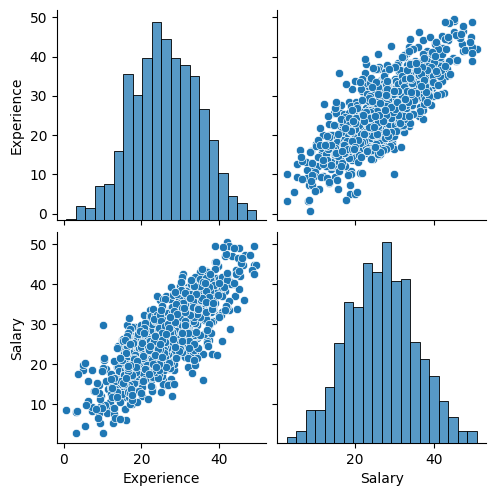

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
X = df[['Experience']]
y = df['Salary']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.25, random_state = 42
)
print("\nTrain Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (747, 1)
Test Shape: (249, 1)


In [20]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [22]:
y_pred = ridgecv.predict(X_test_scaled)

In [23]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📈 Model Evaluation:")
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print("Best Alpha chosen by RidgeCV:", ridgecv.alpha_)


📈 Model Evaluation:
Mean Absolute Error: 4.2286848659767795
R² Score: 0.597661810906303
Best Alpha chosen by RidgeCV: 1.0


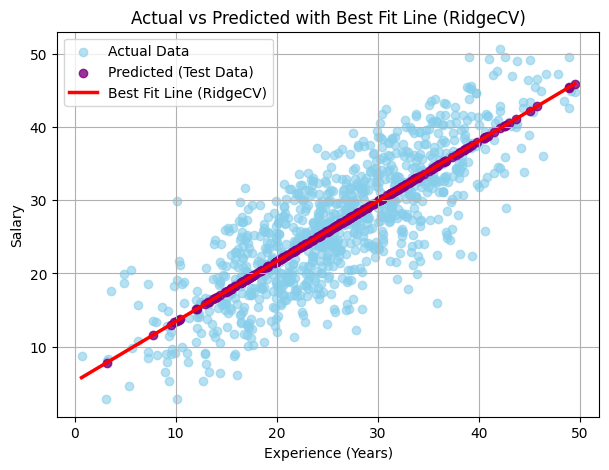

In [24]:
plt.figure(figsize=(7,5))

# Actual data points (entire dataset)
plt.scatter(X, y, color='skyblue', label="Actual Data", alpha=0.6)

# Predicted points (test set)
plt.scatter(X_test, y_pred, color='purple', label="Predicted (Test Data)", alpha=0.8)

# Sorted X for smooth line
X_sorted = np.sort(X['Experience']).reshape(-1, 1)  # reshape for scaler
X_sorted_scaled = scaler.transform(X_sorted)
y_line = ridgecv.predict(X_sorted_scaled)

# Best fit line
plt.plot(X_sorted, y_line, color='red', linewidth=2.5, label="Best Fit Line (RidgeCV)")

# Labels and formatting
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.title("Actual vs Predicted with Best Fit Line (RidgeCV)")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
print("\n⚙️ RidgeCV Model Parameters:")
print(ridgecv.get_params())


⚙️ RidgeCV Model Parameters:
{'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_results': False}


In [26]:
new_exp = pd.DataFrame([[5]], columns=['Experience'])
new_exp_scaled = scaler.transform(new_exp)
predicted_salary = ridgecv.predict(new_exp_scaled)[0]

print("\n💰 Predicted Salary for 5 Years of Experience:", predicted_salary)


💰 Predicted Salary for 5 Years of Experience: 9.32080422791136
